##   Real Estate- Price Predictor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
housing=pd.read_csv("BostonHousing.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#for histogram
# housing.hist(bins=50, figsize=(20,15))

# Train test splitting

In [6]:
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [7]:
# train_set,test_set =split_train_test(housing,0.2)

In [8]:
# print(f"rows in train set :{len(train_set)}\nRows in test set: {len(test_set)}\n")

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set :{len(train_set)}\nRows in test set: {len(test_set)}\n")

rows in train set :404
Rows in test set: 102



In [10]:
#This chas is variable in dataframe which is present is 0 or 1 we need to divide 0 and 1
# equally in our training and testing sets
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['chas']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

## Looking for correlations

In [11]:
corr_matrix=housing.corr()

In [12]:
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

array([[<Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

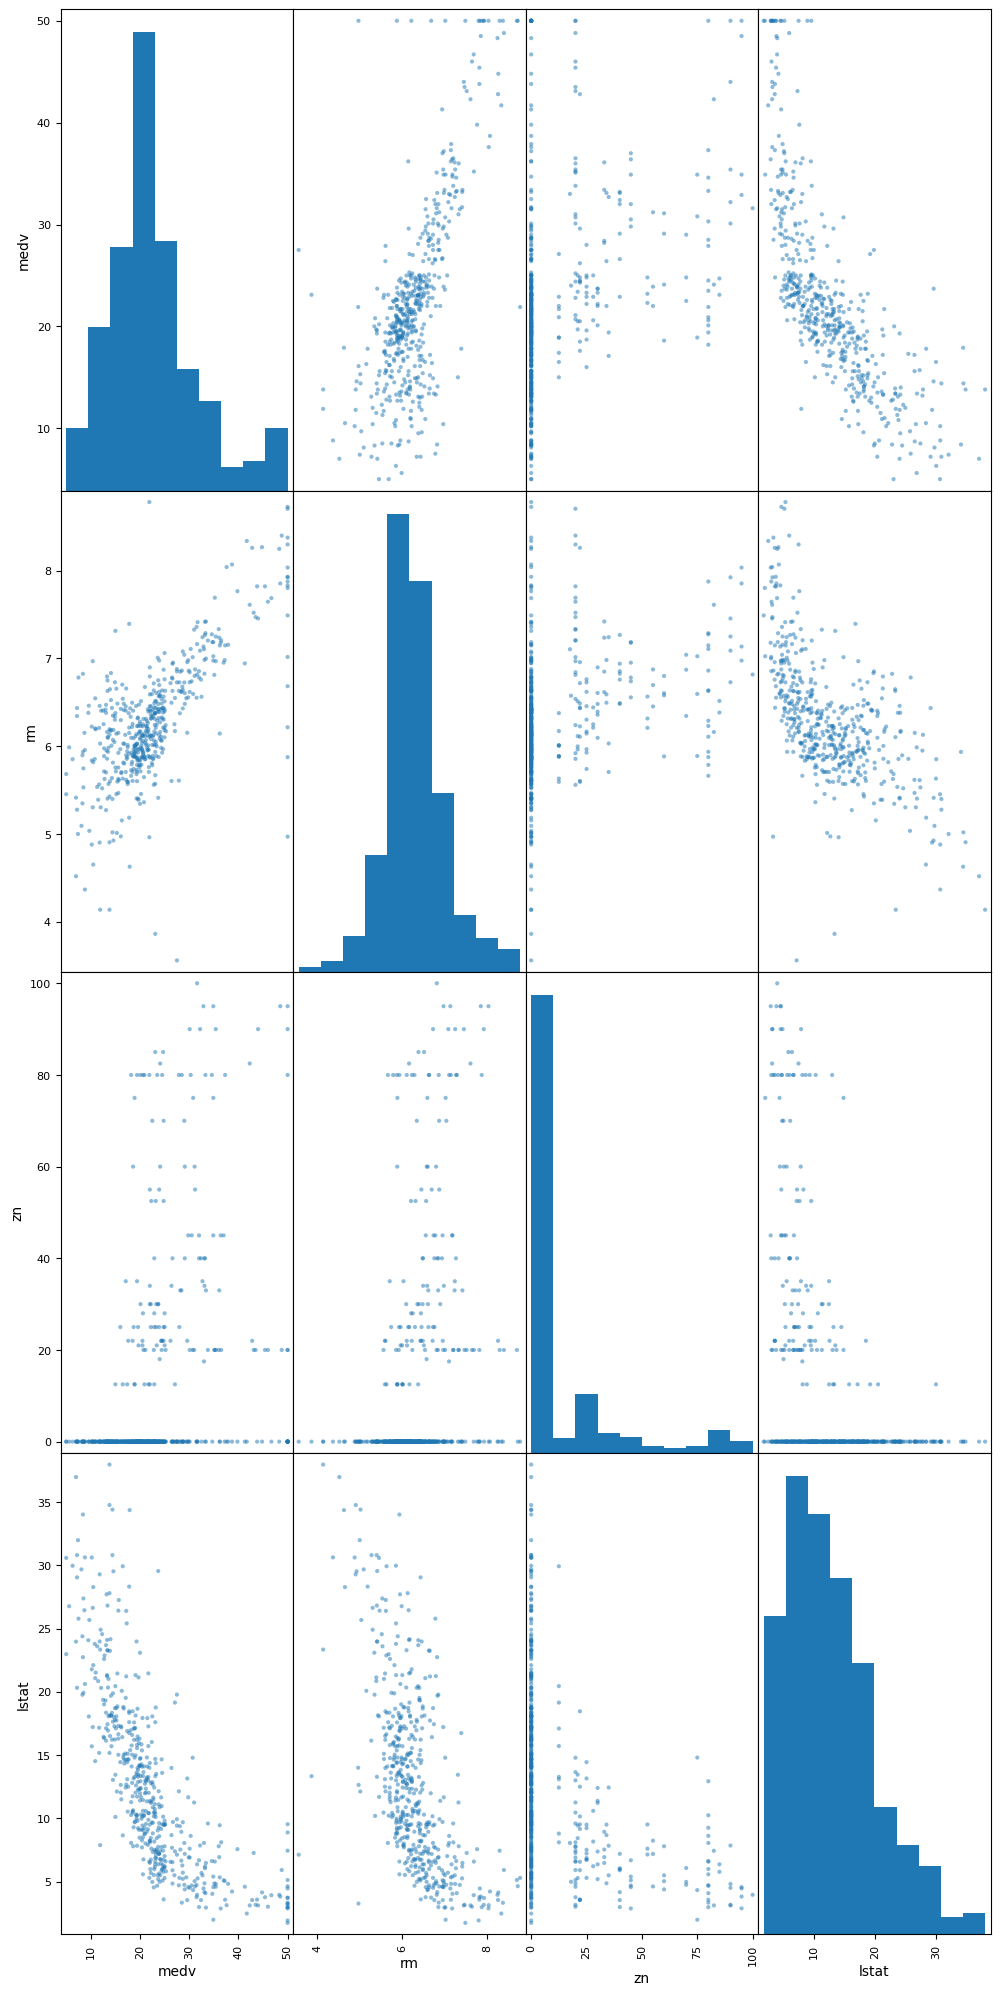

In [13]:
from pandas.plotting import scatter_matrix
attributes=["medv","rm","zn","lstat"]
scatter_matrix(housing[attributes], figsize=(12, 25))


In [14]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
housing=strat_train_set.drop("medv",axis=1)
housing_lable=strat_train_set["medv"].copy()

## If there is missing value in the data frame

In [16]:
#we put the medium of all coloum to that missing value (for this we use a class called imputer)
# or we remove the whole attribute if not important

In [17]:
# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(strategy="median")
# imputer.fit(housing)


## Scikit-learn Design

primarilly three types of objects
1.Estimators-it estimates some parameters based on dataset example imputer
it has two methods fit method that fit the data set
and transform the data

2.Transformers- transforms method take input and return output based on the learning from fit()

3.Pridictors-Leniar regression model it has two common function 1.fit and pridict

Primarilly we have two types of scalling 
1.Min max scalling (normalization)
(value - min )/(max-min)
sk learn provide a class called MinMaxScaler
2.standardization
sk learn provide a class Standard Scaler

## Creating a pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])


In [19]:
housing_num=my_pipeline.fit_transform(housing)

In [20]:
housing_num.shape

(404, 13)

## Selecting a desired model for dragon real state

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num,housing_lable)

RandomForestRegressor()

In [22]:
some_data=housing.iloc[:5]

In [23]:
some_lables=housing_lable.iloc[:5]

In [24]:
prepared_data=my_pipeline.transform(some_data)

In [25]:
model.predict(prepared_data)

array([22.462, 25.539, 16.669, 23.35 , 23.74 ])

In [26]:
list(some_lables)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [27]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num)
mse=mean_squared_error(housing_lable,housing_prediction)
rmse=np.sqrt(mse)

In [28]:
rmse

1.299331763707105

## Useing better evaluation technique - Cross Valdation 

In [29]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num,housing_lable,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)


In [30]:
rmse_scores

array([2.84557227, 2.68926276, 4.34045809, 2.54879684, 3.25670991,
       2.73279293, 4.95167416, 3.39937304, 3.42807696, 3.46036202])

In [31]:
from joblib import dump ,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [32]:
X_test=strat_test_set.drop("medv",axis=1)
Y_test=strat_test_set["medv"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction=model.predict(X_test_prepared)
final_mes = mean_squared_error(Y_test , final_prediction)
final_rmse = np.sqrt(final_mes)
print(final_prediction,list(Y_test))

[24.6   11.06  25.394 22.189 18.133 14.913 20.053 14.393 31.872 43.182
 19.656 11.175 25.019 26.611 19.743 10.567 31.375 14.131 23.51  19.246
 19.877 17.411 17.646 22.081 18.827 30.696 16.281 32.632  8.698 33.876
 24.396 21.307 23.039 10.774 20.973 11.123 44.064 24.727 23.918 42.585
 24.087 30.113 20.587 20.882 18.727 34.078 44.45  20.272 20.728 21.601
 21.038 14.619 21.162 14.855 24.966 33.239 42.889 29.074 19.239 20.751
 46.735  9.867 18.781 25.435 14.794 33.377 19.516 18.161 19.718 33.655
 25.957 22.801 21.457 22.35  34.656 13.506 15.689 20.03  21.017 21.572
 23.175 21.265 13.751 22.882 20.811 21.366 13.996 21.525 22.111 23.461
 18.718 27.216  7.054 26.16  19.903 29.361 19.919 31.794 14.31  26.742
 21.488 20.468] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [33]:
final_rmse

2.9760108251437085

In [34]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
